In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("email_spam_dataset.csv")

In [6]:
# Feature and target
# nOte number of email here means : how many eamils are sent
# in the chain of a single email,or to how many recipients
# in the same email was sent
x = df[["Num_Emails"]]
y = df["Spam"]

In [7]:
# train-test split(80,20)
# stratify = y means both ytraining and test stes should have the  same split between spam (0 and no-spam (1)classes , eg, if non-spam is 90% in training , then it must be 90% in test also)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print("training samples: ",len(x_train))
print("testing samples: ",len(x_test))

training samples:  800
testing samples:  200


In [8]:
# train logistc regression

model = LogisticRegression()
model.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# Predict Probability and labels on test set

y_prob = model.predict_proba(x_test)[:,1] # probability that spam =1
y_pred = (y_prob >= 0.5).astype(int) # decision boundary = 0.5

print(y_prob,y_pred)

[0.38087665 0.03951997 0.16589329 0.02036441 0.28782074 0.49014979
 0.4967136  0.06192279 0.38708813 0.45091683 0.08295777 0.30982211
 0.35643534 0.04262123 0.58133024 0.04156247 0.5620426  0.46395099
 0.02089495 0.7067601  0.67882983 0.53604121 0.08915134 0.15527714
 0.21418278 0.04370573 0.06831259 0.18094237 0.32691519 0.31546524
 0.04262123 0.07904876 0.02256899 0.50327855 0.04262123 0.0375739
 0.26677784 0.03482654 0.06041481 0.5620426  0.73321603 0.43794968
 0.24189221 0.0375739  0.36248158 0.03663573 0.20979615 0.06666006
 0.06041481 0.67307791 0.01934262 0.5620426  0.01885074 0.07904876
 0.41228481 0.67882983 0.09575904 0.57492558 0.39333654 0.7067601
 0.15186379 0.16589329 0.60665597 0.75325378 0.08098176 0.73321603
 0.63751117 0.02256899 0.74336293 0.55556846 0.06041481 0.54256559
 0.04481653 0.39333654 0.772254   0.03310363 0.75325378 0.35643534
 0.6957583  0.71217283 0.01934262 0.74834061 0.69017118 0.50327855
 0.08295777 0.52295758 0.17708311 0.08497753 0.05750143 0.070003

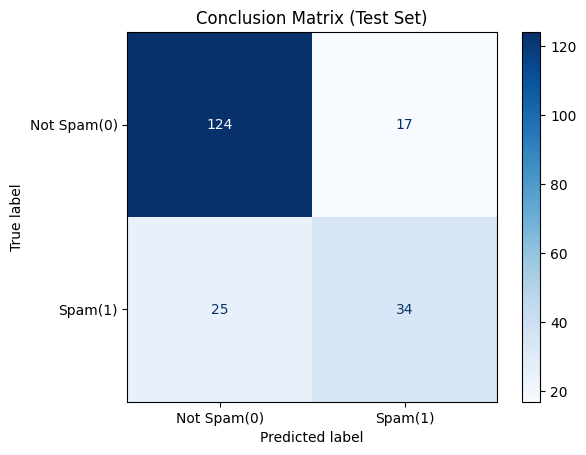

In [10]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Spam(0)","Spam(1)"])
disp.plot(cmap="Blues")
plt.title("Conclusion Matrix (Test Set)")
plt.show()

In [13]:
# Evalution Metrices

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc,prec,rec,f1)


0.79 0.6666666666666666 0.576271186440678 0.6181818181818182
